# **Algoritmo Genético**

## **Marcos Damián Pool Canul** & **Oscar Manuel Ruiz Reyes**

In [119]:
import networkx as nx
import pandas as pd
import heapq as pq
import matplotlib.pyplot as plt
from random import randint, choice, random
from tabulate import tabulate

### Paso 1: Definir el número de vértices

In [120]:
# Numero de vertices
numero_vertices = 8

# Tamaño de la poblacion
poblacion_size = 10

# Numero de generaciones
n_elite = 2

# Los colores posibles
colores = ['red', 'green', 'blue']

### Paso 2: Colorear los vertices aleatoriamente

In [121]:
def colorear_nodos(G, colores):
    for nodo in G.nodes():
        # Asignar un color aleatorio a cada nodo
        G.nodes[nodo]['color'] = choice(colores)
    return G

In [122]:
def guardar_colores(G, nodo_inicial=0):
    """
		Realiza un recorrido DFS en el grafo G y devuelve una secuencia de nodos visitados con sus respectivos colores.
    """

    # Lista para almacenar el número de nodo y el color
    secuencia_colores = []

    # Set para mantener un registro de los nodos visitados
    visitados = set()

    def dfs(nodo):
        if nodo not in visitados:
            visitados.add(nodo)
            # Suponiendo que cada nodo tiene un atributo 'color'
            secuencia_colores.append((G.nodes[nodo].get('color', None)))
            for vecino in G[nodo]:
                dfs(vecino)

    # Iniciar DFS desde el nodo inicial
    dfs(nodo_inicial)

    return secuencia_colores

### Paso 3: Controlar la impresión del grafo

In [123]:
def grafo_conectado(numero_vertices):
    """
    Crea un grafo conectado con un numero de vertices.
    """
    G = nx.Graph()
    G.add_nodes_from(range(numero_vertices))

    for i in range(1, numero_vertices):
        G.add_edge(i - 1, i)

    if numero_vertices > 4:
        for i in range(numero_vertices):
            for j in range(i + 2, min(i + numero_vertices // 3, numero_vertices)):
                G.add_edge(i, j)

        G.add_edge(0, numero_vertices // 3)
        G.add_edge(numero_vertices // 2, numero_vertices - 1)

        if numero_vertices > 6:
            G.add_edge(numero_vertices - 1, numero_vertices // 4)
            G.add_edge(numero_vertices - 2, numero_vertices // 2)

    return G

In [124]:
def dibujar_grafo(G, titulo):
    """
    Dibuja el grafo G con el titulo dado.
    """
    plt.figure(figsize=(8, 6))
    # Kamada-Kawai layout para dibujar el grafo
    posiciones = nx.kamada_kawai_layout(G)
    mapa_colores = [G.nodes[nodo]['color'] for nodo in G.nodes()]
    nx.draw(G, pos=posiciones, with_labels=True,
            node_color=mapa_colores, node_size=500, font_size=10)
    plt.title(titulo)
    plt.show()

### Paso 4: Generar la población

In [125]:
def generar_poblacion(numero_vertices, poblacion_size):
    # Generar una poblacion de grafos coloreados
    poblacion = {}
    # color_grafo = {}
    color_grafo = [None] * poblacion_size
    for i in range(poblacion_size):
        G = grafo_conectado(numero_vertices)
        G = colorear_nodos(G, colores)
        color_grafo[i] = guardar_colores(G)
        poblacion[(i)] = G
    return poblacion, color_grafo

In [126]:
poblacion, colors = generar_poblacion(numero_vertices, poblacion_size)

In [127]:
poblacion

{0: <networkx.classes.graph.Graph at 0x199db1476d0>,
 1: <networkx.classes.graph.Graph at 0x199db157690>,
 2: <networkx.classes.graph.Graph at 0x199db1300d0>,
 3: <networkx.classes.graph.Graph at 0x199db133b90>,
 4: <networkx.classes.graph.Graph at 0x199db132250>,
 5: <networkx.classes.graph.Graph at 0x199da67fa10>,
 6: <networkx.classes.graph.Graph at 0x199da67f210>,
 7: <networkx.classes.graph.Graph at 0x199da67ea10>,
 8: <networkx.classes.graph.Graph at 0x199da67e210>,
 9: <networkx.classes.graph.Graph at 0x199da67da10>}

In [128]:
colors

[['green', 'blue', 'blue', 'green', 'green', 'blue', 'blue', 'green'],
 ['green', 'green', 'green', 'blue', 'red', 'green', 'red', 'blue'],
 ['blue', 'red', 'blue', 'red', 'red', 'red', 'green', 'green'],
 ['red', 'green', 'blue', 'green', 'green', 'red', 'blue', 'blue'],
 ['red', 'red', 'blue', 'green', 'blue', 'red', 'green', 'red'],
 ['blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'green'],
 ['green', 'red', 'green', 'blue', 'blue', 'red', 'blue', 'blue'],
 ['green', 'green', 'red', 'green', 'blue', 'blue', 'green', 'green'],
 ['red', 'blue', 'red', 'green', 'green', 'green', 'blue', 'blue'],
 ['blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'red']]

### Paso 5: Calcular el fitness

In [129]:
def calcular_fitness(G):
    """
    Calcula el fitness de un grafo coloreado.
    """
    errores = 0
    for u, v in G.edges():
        if G.nodes[u]['color'] == G.nodes[v]['color']:
            errores += 1
    return errores

In [130]:
fitness_grafos = [None] * poblacion_size

for i in range(poblacion_size):
	fitness_grafos[i] = calcular_fitness(poblacion[i])

In [131]:
cromosomas = {}

for i in range(poblacion_size):
		cromosomas[poblacion[i]] = calcular_fitness(poblacion[i])

In [132]:
fitness_grafos

[4, 4, 4, 3, 1, 4, 5, 3, 4, 5]

In [133]:
cromosomas

{<networkx.classes.graph.Graph at 0x199db1476d0>: 4,
 <networkx.classes.graph.Graph at 0x199db157690>: 4,
 <networkx.classes.graph.Graph at 0x199db1300d0>: 4,
 <networkx.classes.graph.Graph at 0x199db133b90>: 3,
 <networkx.classes.graph.Graph at 0x199db132250>: 1,
 <networkx.classes.graph.Graph at 0x199da67fa10>: 4,
 <networkx.classes.graph.Graph at 0x199da67f210>: 5,
 <networkx.classes.graph.Graph at 0x199da67ea10>: 3,
 <networkx.classes.graph.Graph at 0x199da67e210>: 4,
 <networkx.classes.graph.Graph at 0x199da67da10>: 5}

In [134]:

claves = list(cromosomas.keys())
valores = list(cromosomas.values())

In [135]:
for i, (graph, fitness) in enumerate(cromosomas.items()):
	print(f'Cromosoma numero {i}: Fitnes = {fitness}')


Cromosoma numero 0: Fitnes = 4
Cromosoma numero 1: Fitnes = 4
Cromosoma numero 2: Fitnes = 4
Cromosoma numero 3: Fitnes = 3
Cromosoma numero 4: Fitnes = 1
Cromosoma numero 5: Fitnes = 4
Cromosoma numero 6: Fitnes = 5
Cromosoma numero 7: Fitnes = 3
Cromosoma numero 8: Fitnes = 4
Cromosoma numero 9: Fitnes = 5


#### Exportamos a un archivo CSV

In [137]:
df = pd.DataFrame({
    'Grafo': claves,
    'Colores': colors,
    'Fitness': fitness_grafos
})

df.to_csv('Grafos.csv', index=False)

df

,Grafo,Colores,Fitness
0,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, blue, blue, green, green, blue, blue, ...",4
1,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, green, green, blue, red, green, red, b...",4
2,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, red, blue, red, red, red, green, green]",4
3,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, green, blue, green, green, red, blue, blue]",3
4,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, red, blue, green, blue, red, green, red]",1
5,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, red, red, red, red, blue, red, green]",4
6,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, red, green, blue, blue, red, blue, blue]",5
7,"(0, 1, 2, 3, 4, 5, 6, 7)","[green, green, red, green, blue, blue, green, ...",3
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[red, blue, red, green, green, green, blue, blue]",4
9,"(0, 1, 2, 3, 4, 5, 6, 7)","[blue, blue, blue, blue, green, blue, blue, red]",5


#### Probamos los grafos

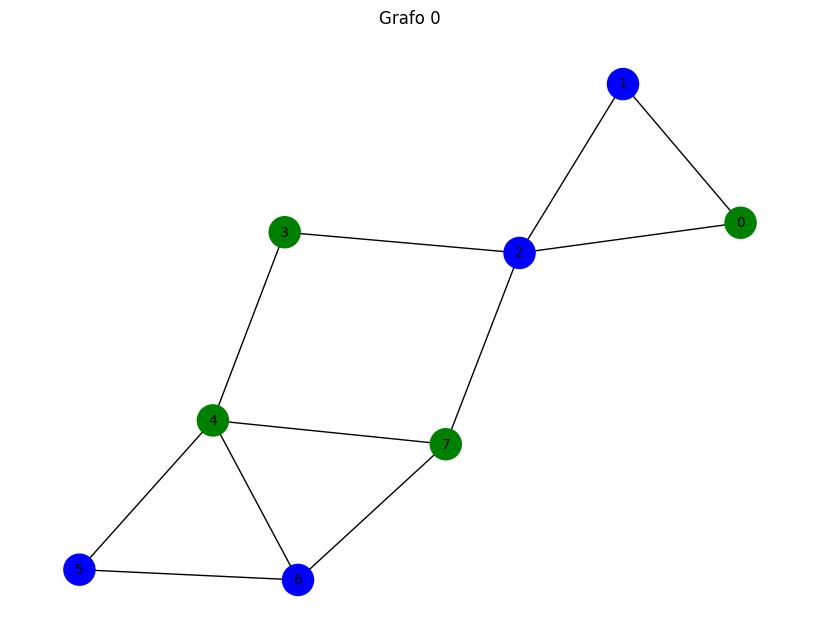

4

In [138]:
dibujar_grafo(claves[0], 'Grafo 0')
calcular_fitness(claves[0])

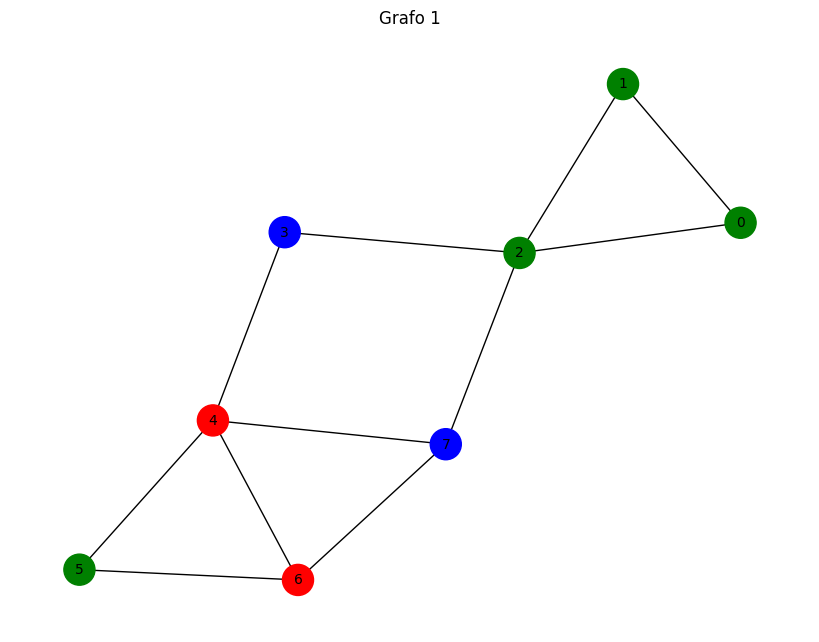

4

In [139]:
dibujar_grafo(claves[1], 'Grafo 1')
calcular_fitness(claves[1])

### Paso 6: Reproducción

### Paso 7: Mutación